# <center> <b> NHÓM 8

# <center> <b> Đề tài 2: Phân loại khách hàng đáng ngờ

<span style="color: #f2cf4a; font-family: Babas; font-size: 2.1em;"> Tóm tắt

Mục tiêu của nhóm là xây dựng mô hình phân loại khách hàng đáng trờ trên dữ liệu năm 2020, với khách hàng đáng ngờ là những khách hàng có chỉ số giao dịch đáng ngờ và thuộc nhóm nợ từ 1-5 được xác định trên dữ liệu năm 2021. Nhóm ưu tiên việc tối đa hóa khả năng dự đoán nhãn 1 (đáng ngờ) của mô hình và chọn recall làm thang đo. Sử dụng thuật toán RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200), nhóm xây dựng được mô hình với recall=0.86.

<span style="color: #f2cf4a; font-family: Babas; font-size: 2.1em;"> Nội dung
    
    1. Chuẩn bị
    2. Xử lý dữ liệu
    3. Khai phá dữ liệu
        3.1. Dataset Week
        3.2. Dataset Month
        3.3. Dataset Three_month
    4. Phát triển mô hình
        4.1. Dataset Week
        4.2. Dataset Month
        4.3. Dataset Three_month
    5. Kết quả và thảo luận
    6. Hạn chế
    7. Reflection

# <b> 1. Chuẩn bị

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
    RandomizedSearchCV, 
    train_test_split,
)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

### Importing the dataset

In [3]:
data = pd.read_csv('dataset.csv')
df = pd.DataFrame(data)
df.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <b> 2. Xử lý dữ liệu

### Kích thước dữ liệu

In [4]:
df.shape

(100000, 50)

- Dữ liệu có 100000 hàng và 50 cột

### Kiểu dữ liệu

In [5]:
df.dtypes

local_ref_1                      object
vn_marital_status                object
resid_province                  float64
resid_district                  float64
resid_wards                     float64
birth_incorp_date               float64
 amount_week                    float64
max_amount_week                 float64
min_amount_week                 float64
distinct_payment_code_week      float64
count_payment_code_week         float64
distinct_trans_group_week       float64
distinct_ref_no_week            float64
amount_month                    float64
max_amount_month                float64
min_amount_month                float64
distinct_payment_code_month     float64
count_payment_code_month        float64
distinct_trans_group_month      float64
distinct_ref_no_month           float64
amount_3month                   float64
max_amount_3month               float64
min_amount_3month               float64
distinct_payment_code_3month      int64
count_payment_code_3month         int64


- Tất cả các trường thông tin đã đúng kiểu dữ liệu
- Tên trường "amount_week" và "total_amt_mar2021" bị thừa khoảng trắng

In [6]:
df = df.rename(columns={' amount_week ': 'amount_week'})
df = df.rename(columns={' total_amt_mar2021 ': 'total_amt_mar2021'})

### Missing Values

In [7]:
df.isna().sum()

local_ref_1                      2734
vn_marital_status                3029
resid_province                   6569
resid_district                   6565
resid_wards                      6567
birth_incorp_date                  10
amount_week                     45200
max_amount_week                 45200
min_amount_week                 45200
distinct_payment_code_week      43150
count_payment_code_week         43150
distinct_trans_group_week       43150
distinct_ref_no_week            43150
amount_month                    23000
max_amount_month                23000
min_amount_month                23000
distinct_payment_code_month     17777
count_payment_code_month        17777
distinct_trans_group_month      17777
distinct_ref_no_month           17777
amount_3month                   13480
max_amount_3month               13480
min_amount_3month               13480
distinct_payment_code_3month        0
count_payment_code_3month           0
distinct_trans_group_3month         0
distinct_ref

### Fill NaN và các thao tác biến đổi khác

- Mã hóa nhị phân cột "Giới tính" với MALE = 1

In [8]:
df['Male'] = np.where(df['local_ref_1'] == 'MALE', 1, 0)
df.drop(['local_ref_1'], axis=1, inplace=True)

- Mã hóa nhị phân cột "Tình trạng hôn nhân" với Single = 1, tất cả các giá trị còn lại bằng 0 (Single và Married chiếm đa số, các tình trạng còn lại là số ít nên để đơn giản hóa, tình trạng hôn nhân bao gồm "độc thân" và "không độc thân")

In [9]:
df['vn_marital_status'].value_counts()

vn_marital_status
Single       54399
Married      42126
Other          363
Partner         38
Divorced        33
Widow            8
Seperated        4
Name: count, dtype: int64

In [10]:
df['Single'] = np.where(df['vn_marital_status'] == 'Single', 1, 0)
df.drop(['vn_marital_status'], axis=1, inplace=True)

- Tính cột tuổi, xóa cột năm sinh, fill NaN bằng median

In [11]:
df['Age'] = 2021 - df['birth_incorp_date']
df.drop(['birth_incorp_date'], axis=1, inplace=True)

In [12]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_6312\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


- Kiểm tra giá trị cột "Age" không hợp lý

In [13]:
cond_age = df['Age'] > 100
df.loc[cond_age]

,resid_province,resid_district,resid_wards,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,Male,Single,Age
18897,75.0,740.0,26389.0,0.0,0.000081,0.000023,2.0,3.0,2.0,4.0,...,0.035203,1.0,21061.0,363.0,DH,1890.0,22312.0,1,0,242.0
39010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,116.0
47634,92.0,916.0,31117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,121.0
54895,15.0,135.0,4348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,137.0
73845,56.0,568.0,22363.0,0.0,0.000229,0.001272,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,948.0


- Xóa các hàng có giá trị cột "Age" không hợp lý

In [14]:
df = df[df['Age'] <= 100]

- Đối với năm 2020, các trường thông tin giao dịch của tuần trước có NaN được hiểu là không có giao dịch và fill NaN bằng 0 do missing values của các cột amount, min, max tương ứng với nhau, đối với các trường thông tin có giá trị 0 từ trước, fill NaN bằng mode
- Tương tự đối với giao dịch của 1 tháng trước và 3 tháng trước

In [15]:
df['distinct_payment_code_week'].value_counts()

distinct_payment_code_week
0.0    39093
1.0    16482
2.0     1163
3.0      101
4.0        8
5.0        1
Name: count, dtype: int64

In [16]:
df['count_payment_code_week'].value_counts()

count_payment_code_week
0.0      39093
1.0      10972
2.0       4044
3.0       1494
4.0        596
5.0        277
6.0        132
7.0         51
8.0         45
9.0         32
10.0        26
11.0        18
16.0         7
14.0         6
182.0        6
12.0         5
13.0         4
28.0         3
23.0         3
17.0         3
29.0         2
20.0         2
82.0         2
27.0         2
132.0        2
43.0         2
15.0         2
24.0         2
31.0         1
42.0         1
41.0         1
39.0         1
35.0         1
19.0         1
26.0         1
40.0         1
25.0         1
21.0         1
67.0         1
114.0        1
61.0         1
37.0         1
331.0        1
Name: count, dtype: int64

In [17]:
df['count_payment_code_week'].value_counts()

count_payment_code_week
0.0      39093
1.0      10972
2.0       4044
3.0       1494
4.0        596
5.0        277
6.0        132
7.0         51
8.0         45
9.0         32
10.0        26
11.0        18
16.0         7
14.0         6
182.0        6
12.0         5
13.0         4
28.0         3
23.0         3
17.0         3
29.0         2
20.0         2
82.0         2
27.0         2
132.0        2
43.0         2
15.0         2
24.0         2
31.0         1
42.0         1
41.0         1
39.0         1
35.0         1
19.0         1
26.0         1
40.0         1
25.0         1
21.0         1
67.0         1
114.0        1
61.0         1
37.0         1
331.0        1
Name: count, dtype: int64

In [18]:
df['distinct_trans_group_week'].value_counts()

distinct_trans_group_week
1.0    34899
2.0    17101
3.0     3932
4.0      788
5.0      118
6.0       10
Name: count, dtype: int64

In [19]:
df['distinct_ref_no_week'].value_counts()

distinct_ref_no_week
1.0       14202
2.0        9491
3.0        6677
4.0        4678
5.0        3426
          ...  
152.0         1
1128.0        1
148.0         1
149.0         1
84.0          1
Name: count, Length: 143, dtype: int64

In [105]:
def fill_na_for_2020(df, period):
    df[f'amount_{period}'].fillna(0, inplace=True)
    df[f'min_amount_{period}'].fillna(0, inplace=True)
    df[f'max_amount_{period}'].fillna(0, inplace=True)
    df[f'distinct_trans_group_{period}'].fillna(0, inplace=True)
    df[f'distinct_ref_no_{period}'].fillna(0, inplace=True)
    df[f'distinct_payment_code_{period}'].fillna(df[f'distinct_payment_code_{period}'].mode()[0], inplace=True)
    df[f'count_payment_code_{period}'].fillna(df[f'count_payment_code_{period}'].mode()[0], inplace=True)
    return df
periods = ['week', 'month', '3month']
for period in periods:
    fill_na_for_2020(df, period)
print("\nUpdated DataFrame:")
print(df)    


Updated DataFrame:
       Male  Single   Age  amount_week  max_amount_week  min_amount_week  \
0         1       0  29.0          0.0           0.0000           0.0000   
1         1       1  35.0          0.0           0.0000           0.0000   
2         1       0  41.0          0.0           0.0000           0.0000   
3         1       1  20.0          0.0           0.0000           0.0000   
4         1       0  32.0          0.0          11.4286          63.5841   
...     ...     ...   ...          ...              ...              ...   
99995     0       1  29.0          0.0           0.0000           0.0000   
99996     1       1  20.0          0.0           0.0000           0.0000   
99997     0       0  34.0          0.0           0.0000           0.0000   
99998     1       1  19.0          0.0           0.0000           0.0000   
99999     1       1  20.0          0.0           0.0000           0.0000   

       distinct_payment_code_week  count_payment_code_week  \
0    

C:\Users\User\AppData\Local\Temp\ipykernel_6312\3673713568.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[f'amount_{period}'].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6312\3673713568.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [21]:
df.head()

,resid_province,resid_district,resid_wards,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,Male,Single,Age
0,27.0,262.0,9436.0,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,29.0
1,79.0,769.0,27097.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0,1,1,35.0
2,1.0,250.0,8989.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,41.0
3,40.0,431.0,18055.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,20.0
4,49.0,512.0,20758.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,32.0


- Một số hàng có giá trị cột số người nhận giao dịch lớn hơn 0 nhưng tổng số tiền giao dịch bằng 0

In [22]:
cond_ref_week = (df['distinct_ref_no_week'] > 0) & (df['max_amount_week'] == 0)
df.loc[cond_ref_week]

,resid_province,resid_district,resid_wards,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,Male,Single,Age
0,27.0,262.0,9436.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,29.0
91,38.0,406.0,16510.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,28.0
103,38.0,395.0,15484.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,29.0
157,10.0,88.0,3001.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,22.0
327,1.0,6.0,178.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,1.0,275.0,9925.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,24.0
99988,24.0,222.0,7807.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,21.0
99989,1.0,274.0,9856.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,17.0
99996,25.0,239.0,8689.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,20.0


In [23]:
cond_ref_month = (df['distinct_ref_no_month'] > 0) & (df['max_amount_month'] == 0)
df.loc[cond_ref_month]

,resid_province,resid_district,resid_wards,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,Male,Single,Age
46,1.0,6.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,29.0
57,87.0,874.0,30157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,19.0
64,19.0,164.0,5464.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,19.0
86,1.0,6.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,21.0
103,38.0,395.0,15484.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,1.0,275.0,9925.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,24.0
99988,24.0,222.0,7807.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,21.0
99989,1.0,274.0,9856.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,17.0
99996,25.0,239.0,8689.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,20.0


In [24]:
cond_ref_3month = (df['distinct_ref_no_3month'] > 0) & (df['max_amount_3month'] == 0)
df.loc[cond_ref_3month]

,resid_province,resid_district,resid_wards,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,Male,Single,Age
3,40.0,431.0,18055.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,20.0
6,1.0,6.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,27.0
9,1.0,6.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,21.0
13,33.0,323.0,11965.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,37.0
15,37.0,369.0,14320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,54.0,555.0,22041.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,18.0
99995,1.0,6.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,29.0
99996,25.0,239.0,8689.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,20.0
99998,1.0,271.0,9706.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,19.0


- Ở một số hàng cột "min_amount_week" có giá trị lớn hơn cột "max_amount_week", có thể do đơn vị của 2 cột khác nhau, cần lưu ý khi đọc kết quả mô hình

In [25]:
check = (df['min_amount_week'] > df['max_amount_week']).sum()
check

23680

In [26]:
check = (df['min_amount_month'] > df['max_amount_month']).sum()
check

9497

In [27]:
check = (df['min_amount_3month'] > df['max_amount_3month']).sum()
check

9803

- Một số hàng giá trị cột tổng số tiền giao dịch nhỏ hơn tổng số tiền giao dịch lớn nhất và nhỏ nhất, có thể do đơn vị của các cột khác nhau, cần lưu ý khi đọc kết quả mô hình

In [28]:
cond_amount_week = df['amount_week'] < df['min_amount_week'] + df['max_amount_week']
df.loc[cond_amount_week]

,resid_province,resid_district,resid_wards,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,Male,Single,Age
4,49.0,512.0,20758.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,32.0
7,38.0,394.0,15436.0,0.0,0.000476,0.000011,0.0,0.0,1.0,11.0,...,0.000000,1.0,1005.0,379.0,NH,1740.0,23311.0,1,0,29.0
12,56.0,568.0,22357.0,0.0,0.000014,0.000079,0.0,0.0,1.0,1.0,...,0.000000,1.0,17001.0,NaN,NH,1740.0,26111.0,1,1,25.0
17,92.0,925.0,31264.0,0.0,0.000449,0.001135,0.0,0.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,31.0
18,38.0,399.0,15874.0,0.0,0.001429,0.000681,0.0,0.0,1.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99956,83.0,829.0,28780.0,0.0,0.000031,0.000172,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,31.0
99976,33.0,330.0,12268.0,0.0,0.000408,0.002271,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,30.0
99980,70.0,689.0,25210.0,0.0,0.000036,0.000203,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,18.0
99985,1.0,250.0,8977.0,0.0,0.000008,0.000045,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,36.0


In [29]:
cond_amount_month = df['amount_month'] < df['min_amount_month'] + df['max_amount_month']
df.loc[cond_amount_month]

,resid_province,resid_district,resid_wards,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,Male,Single,Age
0,27.0,262.0,9436.0,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,29.0
1,79.0,769.0,27097.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0,1,1,35.0
2,1.0,250.0,8989.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,41.0
4,49.0,512.0,20758.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,32.0
5,37.0,377.0,14719.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,66.0,643.0,24124.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,34.0
99992,36.0,363.0,14047.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,22.0
99993,79.0,778.0,27475.0,0.0,0.001633,0.009083,0.0,0.0,1.0,1.0,...,0.002533,1.0,21061.0,365.0,DH,1700.0,22321.0,0,0,32.0
99994,34.0,336.0,12469.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,29.0


In [30]:
cond_amount_3month = df['amount_3month'] < df['min_amount_3month'] + df['max_amount_3month']
df.loc[cond_amount_3month]

,resid_province,resid_district,resid_wards,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,Male,Single,Age
0,27.0,262.0,9436.0,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,29.0
1,79.0,769.0,27097.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0,1,1,35.0
2,1.0,250.0,8989.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,41.0
4,49.0,512.0,20758.0,0.0,0.000114,0.000636,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,32.0
5,37.0,377.0,14719.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,66.0,643.0,24124.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,34.0
99992,36.0,363.0,14047.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,22.0
99993,79.0,778.0,27475.0,0.0,0.001633,0.009083,0.0,0.0,1.0,1.0,...,0.002533,1.0,21061.0,365.0,DH,1700.0,22321.0,0,0,32.0
99994,34.0,336.0,12469.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,29.0


- Nhân các cột liên quan tới số tiền giao dịch với 10^5 để giá trị giữa các trường cân đối 

In [31]:
start_to_multiply = ['amount', 'max_amount', 'min_amount']
end_to_multiply = ['week', 'month', '3month']
for col in df.columns:
    if any(col.startswith(start) and col.endswith(end) for start in start_to_multiply for end in end_to_multiply):
        df[col] *= 1e5

- Đối với năm 2021, các trường thông tin giao dịch có giá trị NaN được hiểu là không có giao dịch, với 3 cột "most_act_mar2021_count", "most_act_mar2021", "total_act_mar2021" có missing values tương ứng nhau và không có giá trị 0 từ trước thì fill NaN bằng 0
- Cột "most_act_mar2021" có kiểu dữ liệu object và không sử dụng để xây dựng mô hình nên không mã hóa và fill NaN bằng "không giao dịch"
- Cột "total_amt_mar2021" có nhiều hơn 3 cột còn lại 621 missing values, tất cả là các giao dịch phi tài chính nên có thể fill NaN cột "total_amt_mar2021" bằng giá trị 0
- Tương tự với các cột juin2021

In [32]:
df['most_act_mar2021_count'].value_counts()

most_act_mar2021_count
1.0       8706
2.0       6868
3.0       5727
4.0       4853
5.0       4106
          ... 
280.0        1
452.0        1
336.0        1
2211.0       1
184.0        1
Name: count, Length: 362, dtype: int64

In [33]:
df['most_act_mar2021'].value_counts()

most_act_mar2021
Giao dich chuyen khoan     59981
Giao dich thanh toan       10769
GIAO DICH PHI TAI CHINH     1721
GIAO DICH TIET KIEM          431
GIAO DICH RUT TIEN ATM       424
GIAO DICH THANH TOAN         145
Name: count, dtype: int64

In [34]:
df['total_act_mar2021'].value_counts()

total_act_mar2021
2.0       5929
1.0       5276
4.0       4490
3.0       4225
6.0       3743
          ... 
1278.0       1
485.0        1
248.0        1
2211.0       1
256.0        1
Name: count, Length: 359, dtype: int64

In [35]:
df['total_amt_mar2021'].value_counts()

total_amt_mar2021
5.360000e-07    452
2.680000e-07    346
1.073000e-06    320
2.682000e-06    293
5.363000e-06    291
               ... 
2.569400e-05      1
5.570090e-04      1
2.165440e-04      1
2.281975e-03      1
1.860500e-05      1
Name: count, Length: 41368, dtype: int64

In [36]:
filtered_df = df.loc[~df['total_act_mar2021'].isna() & df['total_amt_mar2021'].isna()]
filtered_df['most_act_mar2021'].value_counts()

most_act_mar2021
GIAO DICH PHI TAI CHINH    621
Name: count, dtype: int64

In [37]:
def fill_na_for_2021(df, month):
    df[f'most_act_{month}_count'].fillna(0, inplace=True)
    df[f'most_act_{month}'] = df[f'most_act_{month}'].str.lower()
    df[f'most_act_{month}'].fillna('không giao dịch', inplace=True)
    df[f'total_act_{month}'].fillna(0, inplace=True)
    df[f'total_amt_{month}'].fillna(0, inplace=True)
    return df  
months = ['mar2021', 'juin2021']
for month in months:
    df = fill_na_for_2021(df, month)

C:\Users\User\AppData\Local\Temp\ipykernel_6312\1510085889.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[f'most_act_{month}_count'].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6312\1510085889.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [38]:
df['most_act_mar2021'].value_counts()

most_act_mar2021
giao dich chuyen khoan     59981
không giao dịch            26524
giao dich thanh toan       10914
giao dich phi tai chinh     1721
giao dich tiet kiem          431
giao dich rut tien atm       424
Name: count, dtype: int64

- Xóa cột "rd_id" vì id không dùng để xây dựng mô hình

In [39]:
df.drop(['rd_id'], axis=1, inplace=True)

- Tạo cột "HeoSo" thể hiện khách hàng có hoặc không tham gia app Heo Số, với các khách hàng có giá trị cột "savingValueMar2021_heoSo" không NaN hoặc "savingValueJuin2021_heoSo" không NaN thì cột "HeoSo" nhận giá trị 1, còn lại nhận giá trị 0
- Sau đó, xóa tất cả các cột liên quan đến Heo Số

In [40]:
df['HeoSo'] = ((df['savingValueJuin2021_heoSo'].fillna(0) > 0) | (df['savingValueMar2021_heoSo'].fillna(0) > 0)).astype(int)

In [41]:
df['HeoSo'].value_counts()

HeoSo
0    92853
1     7142
Name: count, dtype: int64

In [42]:
df.drop(['savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo', 'totalLoginMar2021_heoSo', 'totalLoginJuin2021_heoSo', 'totalSavings2021_heoSo'], axis=1, inplace=True)

- Đối vợi cột "balanceJuin2021", các giá trị NaN được hiểu là số dư tài khoản tiền gửi của khách hàng tại ngân hàng bằng 0
- Chỉ sử dụng lãi suất thực tế để xây dựng mô hình, xóa cột "nominal_interestJuin2021"
- Đối với cột "real_interestJuin2021", các giá trị NaN được hiểu là khách hàng không vay nợ nên lãi suất bằng 0, tương tự với cột "Nhóm nợ của khách hàng tại ngân hàng"
- Xóa cột "categoryJuin2021", "sub_productJuin2021", "sectorJuin2021", "product_codeJuin2021" do các cột này là id, có missing values tương ứng với 3 cột trên, thể hiện việc khách hàng có vay và các cột trước có thể thể hiện điều này
- Đối với cột "loaikyhanJuin2021", các giá trị NaN được hiểu là khách hàng không vay, mã hóa theo thứ tự 0, 1,2 3 với các giá trị NaN, NH, TH, DH thể hiện có thứ bậc giữa các kỳ hạn, kỳ hạn ngắn tốt hơn kỳ hạn dài, không dùng label encoding vì label encoding mã hóa theo thứ tự chữ cái

In [43]:
condition = df['balanceJuin2021'].isnull() & df['nhomno_xhtdJuin2021'].notnull()
df[condition]

,resid_province,resid_district,resid_wards,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,Male,Single,Age,HeoSo


In [44]:
df['balanceJuin2021'].fillna(0, inplace=True)
df.drop(['nominal_interestJuin2021'], axis=1, inplace=True)
df['real_interestJuin2021'].fillna(0, inplace=True)
df['nhomno_xhtdJuin2021'].fillna(0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_6312\1670011100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balanceJuin2021'].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6312\1670011100.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [45]:
df.drop(['categoryJuin2021', 'sub_productJuin2021', 'sectorJuin2021', 'product_codeJuin2021'], axis=1, inplace=True)

In [46]:
mapping = {'NH': 1, 'TH': 2, 'DH': 3}
df['loaikyhanJuin2021'] = df['loaikyhanJuin2021'].map(mapping).fillna(0).astype(int)

- Đối với các cột liên quan đến nơi sinh sống, giá trị chủ yếu là 1 nên số lượng khách hàng đáng ngờ ở vùng 1 cao hơn các vùng khác, nếu sử dụng các cột nơi sinh sống để xây dựng mô hình sẽ dẫn đến việc hiểu sai lệch kết quả, vì vậy xóa các cột liên quan đến nơi sinh sống

In [47]:
df['resid_province'].value_counts()

resid_province
1.0     31646
79.0     6428
31.0     3399
38.0     3050
36.0     2428
        ...  
6.0        75
62.0       74
4.0        58
12.0       32
0.0         1
Name: count, Length: 64, dtype: int64

In [48]:
df.drop(['resid_province', 'resid_district', 'resid_wards'], axis=1, inplace=True)

In [49]:
df.columns

Index(['amount_week', 'max_amount_week', 'min_amount_week',
       'distinct_payment_code_week', 'count_payment_code_week',
       'distinct_trans_group_week', 'distinct_ref_no_week', 'amount_month',
       'max_amount_month', 'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'most_act_mar2021_count', 'most_act_mar2021',
       'total_act_mar2021', 'total_amt_mar2021', 'most_act_juin2021_count',
       'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021',
       'balanceJuin2021', 'real_interestJuin2021', 'nhomno_xhtdJuin2021',
       'loaikyhanJuin2021', 'Male', 'Single', 'Age', 'HeoSo'],
      dtype='object')

- Sắp xếp lại các cột, không xóa quan sát nên không đánh lại chỉ mục

In [50]:
df = df[['Male', 'Single', 'Age','amount_week', 'max_amount_week', 'min_amount_week',
       'distinct_payment_code_week', 'count_payment_code_week',
       'distinct_trans_group_week', 'distinct_ref_no_week', 'amount_month',
       'max_amount_month', 'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'most_act_mar2021_count', 'most_act_mar2021',
       'total_act_mar2021', 'total_amt_mar2021', 'most_act_juin2021_count',
       'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021',
       'balanceJuin2021', 'real_interestJuin2021', 'nhomno_xhtdJuin2021',
       'loaikyhanJuin2021', 'HeoSo']]

In [51]:
df.shape

(99995, 37)

# <b> 3. Khai phá dữ liệu

- Tạo cột "Incredible", các quan sát có giá trị các cột liên quan đến giao dịch của năm 2021 bất thường hoặc cột "nhomno_xhtdJuin2021" có giá trị lớn hơn 0 thì điền 1 vào "Incredible", còn lại điền 0

In [52]:
df['Incredible'] = np.where(
    ((df['most_act_mar2021_count'] > df['most_act_mar2021_count'].quantile(0.75)) |
     (df['total_act_mar2021'] > df['total_act_mar2021'].quantile(0.75)) |
     (df['total_amt_mar2021'] > df['total_amt_mar2021'].quantile(0.75)) |
     (df['most_act_juin2021_count'] > df['most_act_juin2021_count'].quantile(0.75)) |
     (df['total_act_juin2021'] > df['total_act_juin2021'].quantile(0.75)) |
     (df['total_amt_juin2021'] > df['total_amt_juin2021'].quantile(0.75)) |
     (df['nhomno_xhtdJuin2021'] > 0)),
    1, 0)

In [53]:
df.head()

,Male,Single,Age,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,most_act_juin2021_count,most_act_juin2021,total_act_juin2021,total_amt_juin2021,balanceJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,loaikyhanJuin2021,HeoSo,Incredible
0,1,0,29.0,0.0,0.0000,0.0000,0.0,0.0,1.0,1.0,...,14.0,giao dich chuyen khoan,17.0,0.006543,0.000000,0.000000,0.0,0,0,1
1,1,1,35.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,...,1.0,giao dich thanh toan,1.0,0.000062,0.003666,0.004128,1.0,3,0,1
2,1,0,41.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,...,1.0,giao dich chuyen khoan,2.0,0.000071,0.000000,0.000000,0.0,0,0,0
3,1,1,20.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,...,0.0,không giao dịch,0.0,0.000000,0.000000,0.000000,0.0,0,0,0
4,1,0,32.0,0.0,11.4286,63.5841,0.0,0.0,1.0,1.0,...,17.0,giao dich chuyen khoan,19.0,0.000575,0.000000,0.000000,0.0,0,0,1


In [54]:
df['Incredible'].value_counts()

Incredible
1    55760
0    44235
Name: count, dtype: int64

- Nhãn 0, 1 khá cân bằng nên không upsampling hoặc downsampling

In [55]:
df.to_csv('cleaned_data.csv', index=False)

- Lọc các cột của năm 2020 để xây dựng mô hình

In [56]:
selected_columns = ['Male', 'Single', 'Age','amount_week', 'max_amount_week', 'min_amount_week',
       'distinct_payment_code_week', 'count_payment_code_week',
       'distinct_trans_group_week', 'distinct_ref_no_week', 'amount_month',
       'max_amount_month', 'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'Incredible']
df[selected_columns].to_csv('data_for_model.csv', index=False)

In [57]:
data2 = pd.read_csv('data_for_model.csv')
df2 = pd.DataFrame(data2)
df2.head()

,Male,Single,Age,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,Incredible
0,1,0,29.0,0.0,0.0000,0.0000,0.0,0.0,1.0,1.0,...,2.0,12.0,7.35,40.00,0.5920,0,0,2,33,1
1,1,1,35.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,...,1.0,1.0,1.38,6.85,11.0318,0,0,2,5,1
2,1,0,41.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,...,1.0,2.0,1.57,6.00,2.1000,2,3,2,7,0
3,1,1,20.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0000,0,0,1,1,0
4,1,0,32.0,0.0,11.4286,63.5841,0.0,0.0,1.0,1.0,...,3.0,12.0,7.45,38.00,0.0592,1,11,3,24,1


- Tính hệ số tương quan

In [58]:
corr_matrix = df2.corr()
corr_matrix

,Male,Single,Age,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,...,distinct_trans_group_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,Incredible
Male,1.000000,0.057321,0.033725,-0.018571,-0.035748,-0.005004,-0.010322,0.000352,-0.077307,-0.049196,...,-0.072006,-0.037686,-0.024118,-0.035209,0.000161,-0.029156,-0.000520,-0.069193,-0.037750,0.002548
Single,0.057321,1.000000,-0.499912,-0.024950,-0.045837,-0.028868,-0.048167,-0.022248,-0.083790,-0.039100,...,-0.130786,-0.044533,-0.041237,-0.072961,-0.020611,-0.162323,-0.065692,-0.131632,-0.054496,-0.234229
Age,0.033725,-0.499912,1.000000,0.032985,0.054051,0.053871,0.016840,0.006741,0.013214,-0.004668,...,0.041520,-0.002459,0.046831,0.089243,0.036756,0.120248,0.029063,0.021533,0.000981,0.190431
amount_week,-0.018571,-0.024950,0.032985,1.000000,0.843923,0.092155,0.016170,0.006390,0.077200,0.178730,...,0.059815,0.152602,0.829505,0.576998,0.002225,0.037984,0.019926,0.054416,0.148449,0.058573
max_amount_week,-0.035748,-0.045837,0.054051,0.843923,1.000000,0.233999,0.041125,0.011685,0.152525,0.148163,...,0.121428,0.120699,0.708997,0.640420,0.005812,0.076100,0.028262,0.112149,0.125403,0.106957
min_amount_week,-0.005004,-0.028868,0.053871,0.092155,0.233999,1.000000,-0.027184,-0.009384,0.021609,-0.009200,...,0.005307,-0.008986,0.027865,0.112209,0.037168,-0.019326,-0.015630,-0.004354,-0.010298,0.025125
distinct_payment_code_week,-0.010322,-0.048167,0.016840,0.016170,0.041125,-0.027184,1.000000,0.339661,0.567336,0.209269,...,0.337195,0.156689,0.033520,0.031986,-0.013361,0.410627,0.383758,0.272712,0.159554,0.130668
count_payment_code_week,0.000352,-0.022248,0.006741,0.006390,0.011685,-0.009384,0.339661,1.000000,0.193914,0.285938,...,0.111019,0.148745,0.017596,0.007982,-0.004554,0.139083,0.680771,0.091490,0.120233,0.055945
distinct_trans_group_week,-0.077307,-0.083790,0.013214,0.077200,0.152525,0.021609,0.567336,0.193914,1.000000,0.405122,...,0.687271,0.324683,0.103490,0.133714,-0.022783,0.416393,0.295519,0.587035,0.331981,0.351164
distinct_ref_no_week,-0.049196,-0.039100,-0.004668,0.178730,0.148163,-0.009200,0.209269,0.285938,0.405122,1.000000,...,0.317527,0.887983,0.197283,0.118903,-0.010429,0.216231,0.294247,0.293103,0.748698,0.240973


- Lọc các cặp cột có hệ số tương quan cao

In [59]:
high_corr_threshold = 0.5

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > high_corr_threshold:
            colname = corr_matrix.columns[i]
            rowname = corr_matrix.index[j]
            high_corr_pairs.append((rowname, colname))

print("Các cặp cột có tương quan cao:")
for pair in high_corr_pairs:
    print(pair)

Các cặp cột có tương quan cao:
('amount_week', 'max_amount_week')
('distinct_payment_code_week', 'distinct_trans_group_week')
('amount_week', 'amount_month')
('max_amount_week', 'amount_month')
('amount_week', 'max_amount_month')
('max_amount_week', 'max_amount_month')
('amount_month', 'max_amount_month')
('distinct_payment_code_week', 'distinct_payment_code_month')
('count_payment_code_week', 'count_payment_code_month')
('distinct_trans_group_week', 'distinct_trans_group_month')
('distinct_payment_code_month', 'distinct_trans_group_month')
('distinct_ref_no_week', 'distinct_ref_no_month')
('amount_week', 'amount_3month')
('max_amount_week', 'amount_3month')
('amount_month', 'amount_3month')
('max_amount_month', 'amount_3month')
('amount_week', 'max_amount_3month')
('max_amount_week', 'max_amount_3month')
('amount_month', 'max_amount_3month')
('max_amount_month', 'max_amount_3month')
('amount_3month', 'max_amount_3month')
('min_amount_month', 'min_amount_3month')
('distinct_payment_cod

- Các trường thông tin của week, month và 3month đều phụ thuộc lẫn nhau, vì vậy nhóm tách data thành 3 bộ: week, month và three_month với mục đích xác định khoảng thời gian tốt nhất để xác định khách hàng đáng ngờ: nếu bộ week tốt nhất nghĩa là sau 6 tháng, month tốt nhất là 7 tháng và 3month tốt nhất là 9 tháng

In [60]:
week = ['Male', 'Single', 'Age', 'amount_week', 'max_amount_week', 'min_amount_week',
       'distinct_payment_code_week', 'count_payment_code_week',
       'distinct_trans_group_week', 'distinct_ref_no_week', 'Incredible']
df2[week].to_csv('week.csv', index=False)

In [61]:
month = ['Male', 'Single', 'Age', 'amount_month',
       'max_amount_month', 'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'Incredible']
df2[month].to_csv('month.csv', index=False)

In [62]:
three_month = ['Male', 'Single', 'Age', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'Incredible']
df2[three_month].to_csv('three_month.csv', index=False)

# <b> 3.1. Dataset Week

In [63]:
week = pd.read_csv('week.csv')
df_week = pd.DataFrame(week)
df_week.head()

,Male,Single,Age,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,Incredible
0,1,0,29.0,0.0,0.0000,0.0000,0.0,0.0,1.0,1.0,1
1,1,1,35.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1
2,1,0,41.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0
3,1,1,20.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0
4,1,0,32.0,0.0,11.4286,63.5841,0.0,0.0,1.0,1.0,1


In [64]:
corr_matrix_week = df_week.corr()
corr_matrix_week

,Male,Single,Age,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,distinct_ref_no_week,Incredible
Male,1.000000,0.057321,0.033725,-0.018571,-0.035748,-0.005004,-0.010322,0.000352,-0.077307,-0.049196,0.002548
Single,0.057321,1.000000,-0.499912,-0.024950,-0.045837,-0.028868,-0.048167,-0.022248,-0.083790,-0.039100,-0.234229
Age,0.033725,-0.499912,1.000000,0.032985,0.054051,0.053871,0.016840,0.006741,0.013214,-0.004668,0.190431
amount_week,-0.018571,-0.024950,0.032985,1.000000,0.843923,0.092155,0.016170,0.006390,0.077200,0.178730,0.058573
max_amount_week,-0.035748,-0.045837,0.054051,0.843923,1.000000,0.233999,0.041125,0.011685,0.152525,0.148163,0.106957
min_amount_week,-0.005004,-0.028868,0.053871,0.092155,0.233999,1.000000,-0.027184,-0.009384,0.021609,-0.009200,0.025125
distinct_payment_code_week,-0.010322,-0.048167,0.016840,0.016170,0.041125,-0.027184,1.000000,0.339661,0.567336,0.209269,0.130668
count_payment_code_week,0.000352,-0.022248,0.006741,0.006390,0.011685,-0.009384,0.339661,1.000000,0.193914,0.285938,0.055945
distinct_trans_group_week,-0.077307,-0.083790,0.013214,0.077200,0.152525,0.021609,0.567336,0.193914,1.000000,0.405122,0.351164
distinct_ref_no_week,-0.049196,-0.039100,-0.004668,0.178730,0.148163,-0.009200,0.209269,0.285938,0.405122,1.000000,0.240973


In [65]:
high_corr_threshold = 0.5

high_corr_pairs = []

for i in range(len(corr_matrix_week.columns)):
    for j in range(i):
        if abs(corr_matrix_week.iloc[i, j]) > high_corr_threshold:
            colname = corr_matrix_week.columns[i]
            rowname = corr_matrix_week.index[j]
            high_corr_pairs.append((rowname, colname))

print("Các cặp cột có tương quan cao:")
for pair in high_corr_pairs:
    print(pair)

Các cặp cột có tương quan cao:
('amount_week', 'max_amount_week')
('distinct_payment_code_week', 'distinct_trans_group_week')


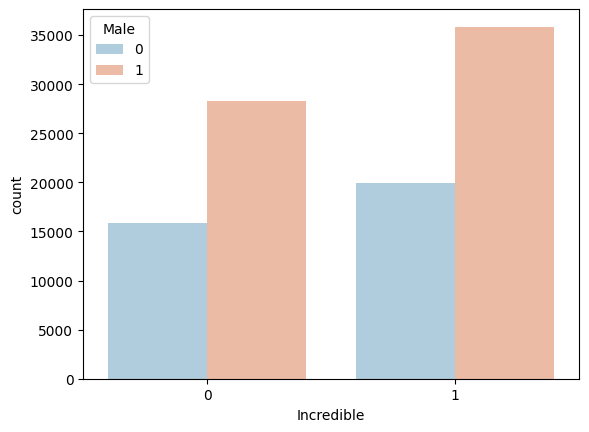

In [66]:
sns.countplot(x='Incredible', hue='Male', data=df_week, palette='RdBu_r')
plt.show()

- Tỷ lệ khách hàng đáng ngờ là nam cao hơn nữ, có thể do trong dữ liệu, số khách hàng nam nhiều hơn số khách hàng nữ

<Axes: xlabel='Age', ylabel='Count'>

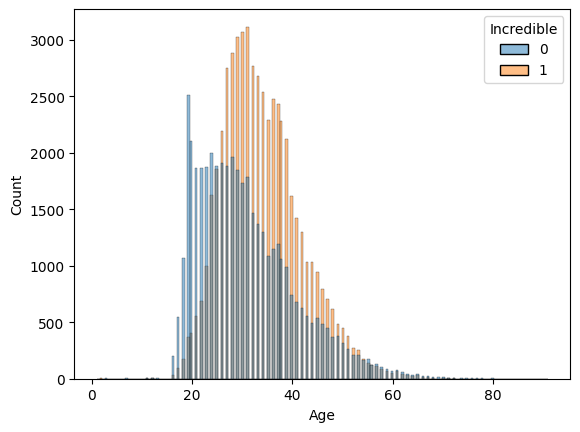

In [67]:
sns.histplot(df_week, x="Age", hue="Incredible") 

- Nhóm khách hàng 30 tuổi có số lượng khách hàng đáng ngờ cao nhất so với các độ tuổi khác. Trước 30 tuổi, tuổi càng tăng, số lượng khách hàng đáng ngờ càng tăng, sau 30 tuổi, tuổi càng tăng, số lượng khách hàng đáng ngờ càng giảm. Có thể sử dụng cột "Age" để xây dựng mô hình, phải tăng bậc cho cột "Age"

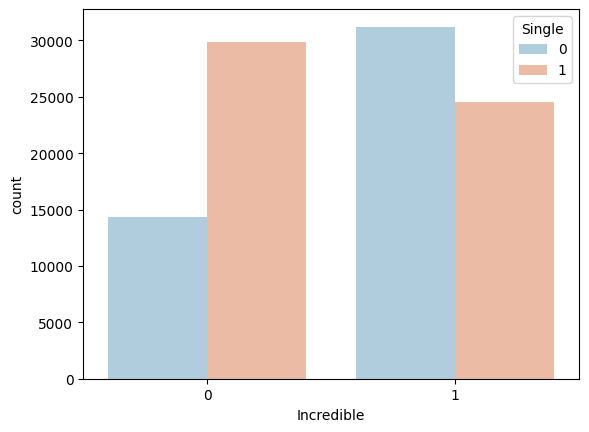

In [68]:
sns.countplot(x='Incredible', hue='Single', data=df_week, palette='RdBu_r')
plt.show()

- Khách hàng có tình trạng hôn nhân khác độc thân chiếm số lượng khách hàng đáng ngờ cao hơn, có thể sử dụng cột "Single" để xây dựng mô hình

<Axes: xlabel='distinct_payment_code_week', ylabel='count'>

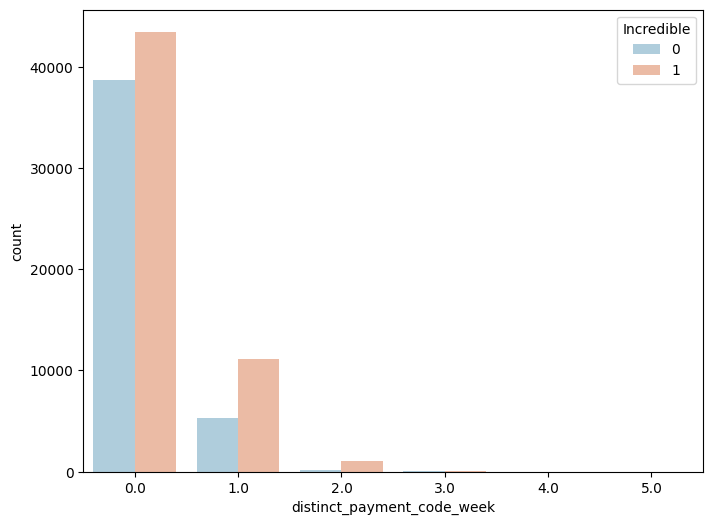

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(x='distinct_payment_code_week', hue='Incredible', data=df_week, palette='RdBu_r')

- Khách hàng không sử dụng dịch vụ nào trong tuần trước có khả năng là khách hàng đáng ngờ hơn

<Axes: xlabel='distinct_trans_group_week', ylabel='count'>

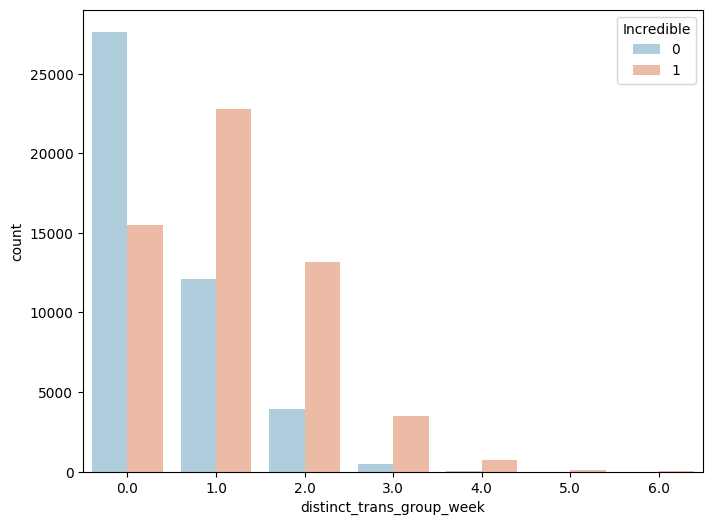

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(x='distinct_trans_group_week', hue='Incredible', data=df_week, palette='RdBu_r')

- Khách hàng ở nhóm giao dịch 1 có khả năng là khách hàng đáng ngờ cao hơn
- Cột "distinct_trans_group_week" có tương quan cao với "distinct_payment_code_week". Nhóm sử dụng cột "distinct_payment_code_week" để xây dựng mô hình vì cột "distinct_payment_code_week" thể hiện rõ ràng đặc điểm của khách hàng đáng ngờ hơn cột "distinct_trans_group_week" trong khi hệ số tương quan của 2 cột với cột "Incredible" là như nhau.

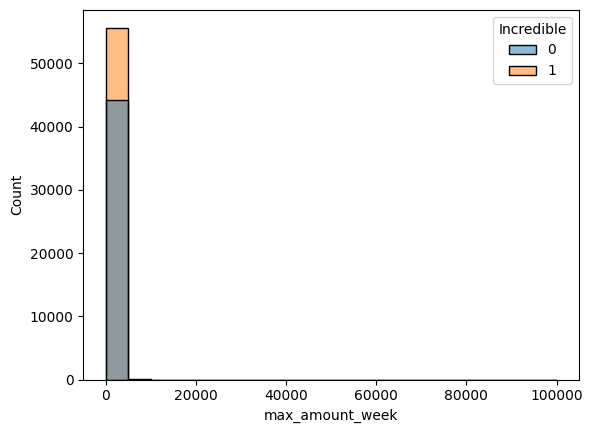

In [71]:
sns.histplot(df_week, x='max_amount_week', hue='Incredible', bins=20)
plt.show()

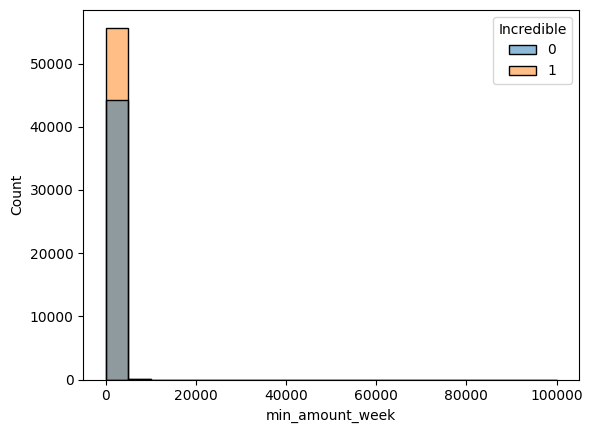

In [72]:
sns.histplot(df_week, x='min_amount_week', hue='Incredible', bins=20)
plt.show()

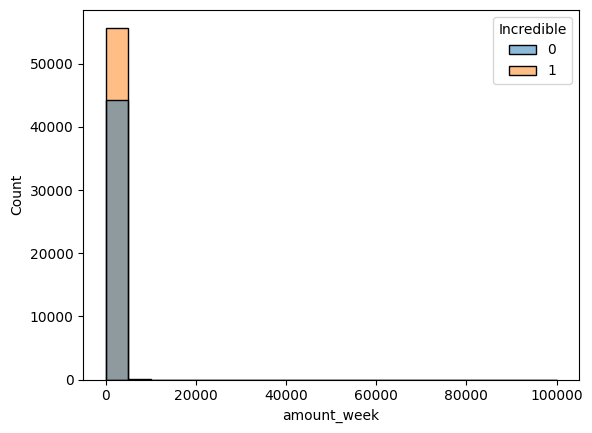

In [73]:
sns.histplot(df_week, x='amount_week', hue='Incredible', bins=20)
plt.show()

- 3 cột amount, max và min có tác động giống nhau tới cột "Incredible"
- Cột amount tương quan cao với cột max nên nhóm không sử dụng cột amount để xây dựng mô hình vì 2 cột max và min cũng phản ánh amount
- Cột min và max phản ánh đầy đủ hơn cột amount, không chỉ tổng số tiền giao dịch hay số tiền giao dịch lớn nhất cao bất thường mới là đáng ngờ mà tổng số tiền giao dịch nhỏ nhất cao bất ngờ cũng là đáng ngờ

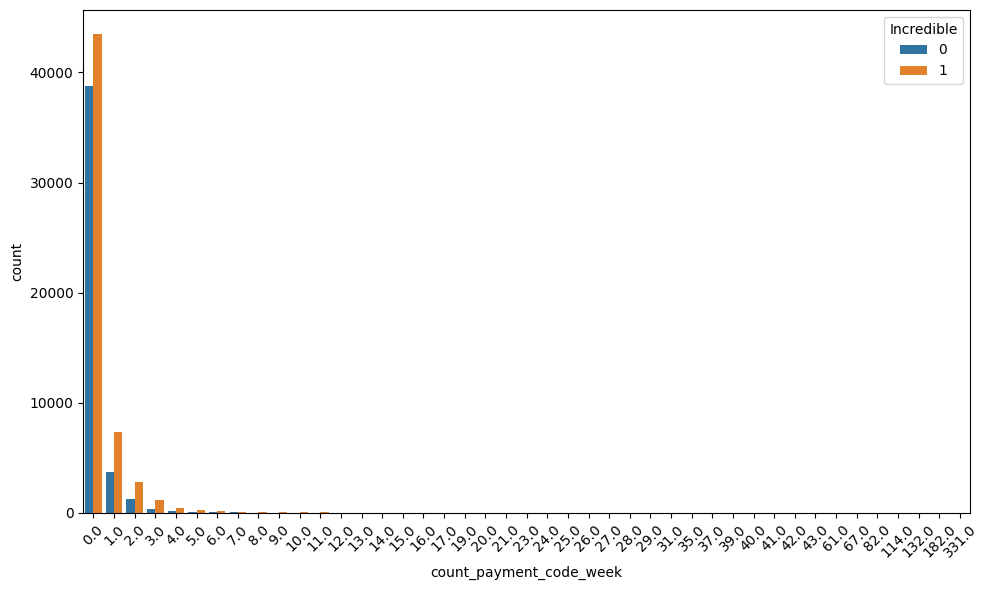

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(df_week, x='count_payment_code_week', hue='Incredible') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

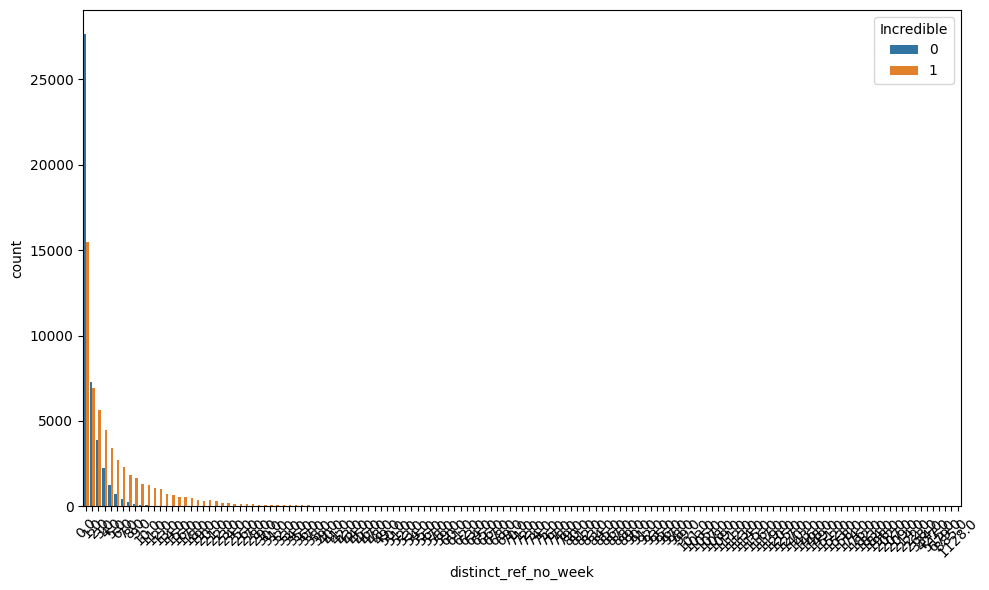

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(df_week, x='distinct_ref_no_week', hue='Incredible') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

- 2 cột "count_payment_code_week" và "distinct_ref_no_week" đều có ảnh hưởng tới cột "Incredible"
- các cột đều có outliers nhưng trong bài toán xác định khách hàng đáng ngờ, các outliers có thể chính là những khách hàng đáng ngờ nên nhóm không xóa outliers

# <b> 3.2. Dataset Month

- Tương tự với Dataset Week nhưng không cần vẽ lại các cột "Age", "Single", "Male" vì những thông tn đó của khách hàng không thay đổi

In [76]:
month = pd.read_csv('month.csv')
df_month = pd.DataFrame(month)
df_month.head()

,Male,Single,Age,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,Incredible
0,1,0,29.0,5.65,20.4082,0.8280,0.0,0.0,2.0,12.0,1
1,1,1,35.0,1.91,13.9819,20.2648,0.0,0.0,1.0,1.0,1
2,1,0,41.0,3.03,12.2449,14.3495,0.0,0.0,1.0,2.0,0
3,1,1,20.0,0.00,0.0000,0.0000,0.0,0.0,0.0,0.0,0
4,1,0,32.0,9.65,24.7347,0.1180,1.0,5.0,3.0,12.0,1


In [77]:
corr_matrix_month = df_month.corr()
corr_matrix_month

,Male,Single,Age,amount_month,max_amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,Incredible
Male,1.000000,0.057321,0.033725,-0.029546,-0.038218,-0.005455,-0.028019,0.001236,-0.072006,-0.037686,0.002548
Single,0.057321,1.000000,-0.499912,-0.046615,-0.066896,-0.013738,-0.134059,-0.045723,-0.130786,-0.044533,-0.234229
Age,0.033725,-0.499912,1.000000,0.055505,0.084955,0.027107,0.108605,0.019439,0.041520,-0.002459,0.190431
amount_month,-0.029546,-0.046615,0.055505,1.000000,0.653681,0.059946,0.086252,0.037874,0.116401,0.275606,0.116660
max_amount_month,-0.038218,-0.066896,0.084955,0.653681,1.000000,0.331084,0.080579,0.021847,0.155688,0.133824,0.134857
min_amount_month,-0.005455,-0.013738,0.027107,0.059946,0.331084,1.000000,-0.018085,-0.008022,-0.009474,-0.008208,-0.000189
distinct_payment_code_month,-0.028019,-0.134059,0.108605,0.086252,0.080579,-0.018085,1.000000,0.385621,0.570063,0.220484,0.210888
count_payment_code_month,0.001236,-0.045723,0.019439,0.037874,0.021847,-0.008022,0.385621,1.000000,0.239269,0.229735,0.109314
distinct_trans_group_month,-0.072006,-0.130786,0.041520,0.116401,0.155688,-0.009474,0.570063,0.239269,1.000000,0.310428,0.356801
distinct_ref_no_month,-0.037686,-0.044533,-0.002459,0.275606,0.133824,-0.008208,0.220484,0.229735,0.310428,1.000000,0.242334


In [78]:
high_corr_threshold = 0.5

high_corr_pairs = []

for i in range(len(corr_matrix_month.columns)):
    for j in range(i):
        if abs(corr_matrix_month.iloc[i, j]) > high_corr_threshold:
            colname = corr_matrix_month.columns[i]
            rowname = corr_matrix_month.index[j]
            high_corr_pairs.append((rowname, colname))

print("Các cặp cột có tương quan cao:")
for pair in high_corr_pairs:
    print(pair)

Các cặp cột có tương quan cao:
('amount_month', 'max_amount_month')
('distinct_payment_code_month', 'distinct_trans_group_month')


<Axes: xlabel='distinct_payment_code_month', ylabel='count'>

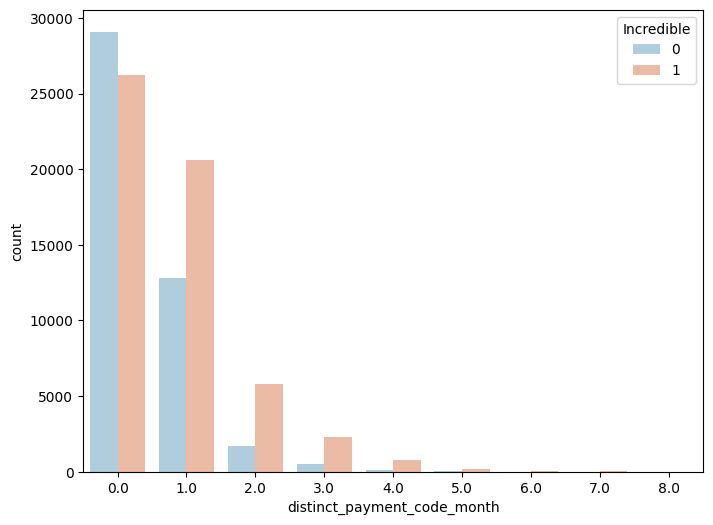

In [79]:
plt.figure(figsize=(8, 6))
sns.countplot(x='distinct_payment_code_month', hue='Incredible', data=df_month, palette='RdBu_r')

<Axes: xlabel='distinct_trans_group_month', ylabel='count'>

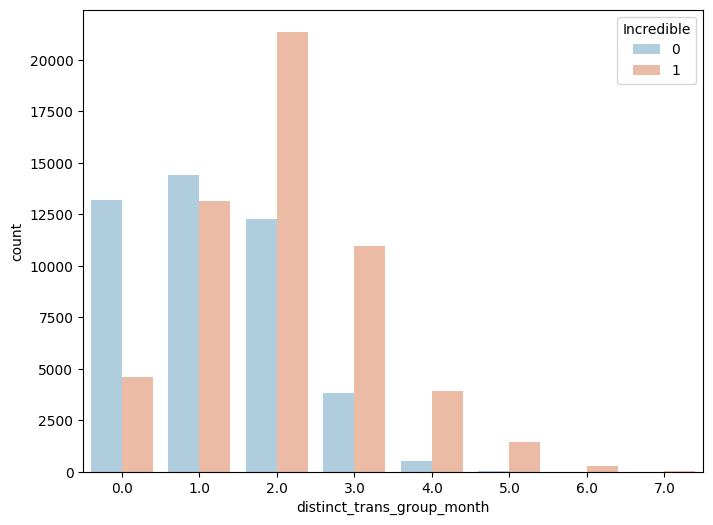

In [80]:
plt.figure(figsize=(8, 6))
sns.countplot(x='distinct_trans_group_month', hue='Incredible', data=df_month, palette='RdBu_r')

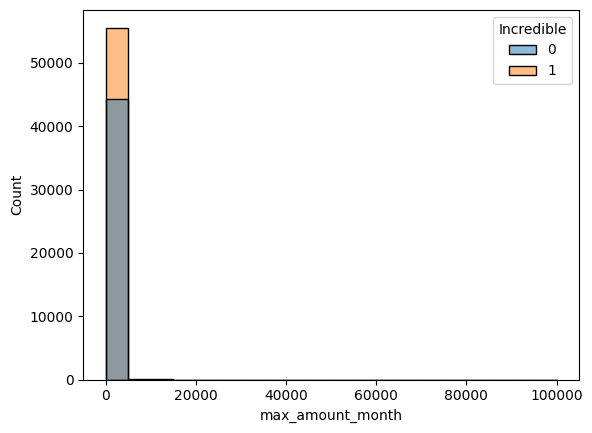

In [81]:
sns.histplot(df_month, x='max_amount_month', hue='Incredible', bins=20)
plt.show()

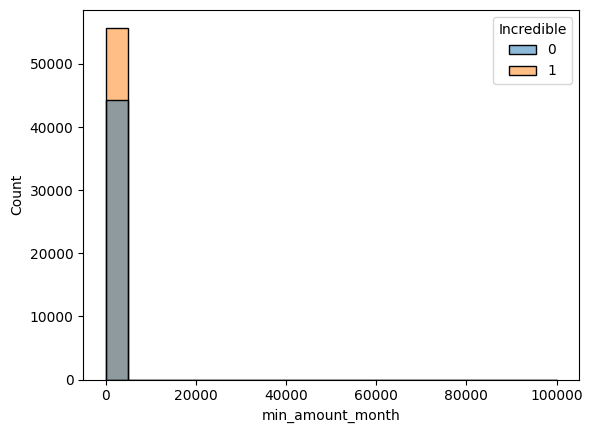

In [82]:
sns.histplot(df_month, x='min_amount_month', hue='Incredible', bins=20)
plt.show()

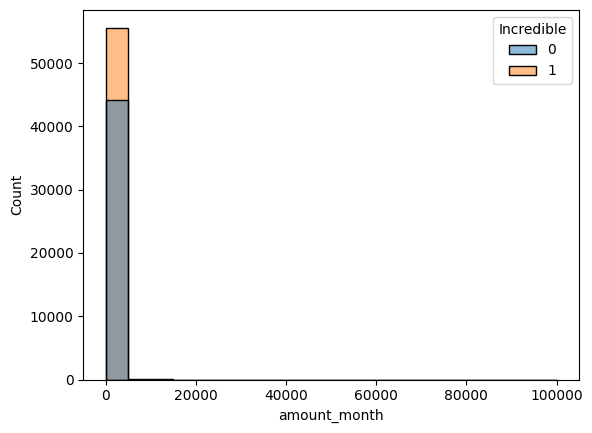

In [83]:
sns.histplot(df_month, x='amount_month', hue='Incredible', bins=20)
plt.show()

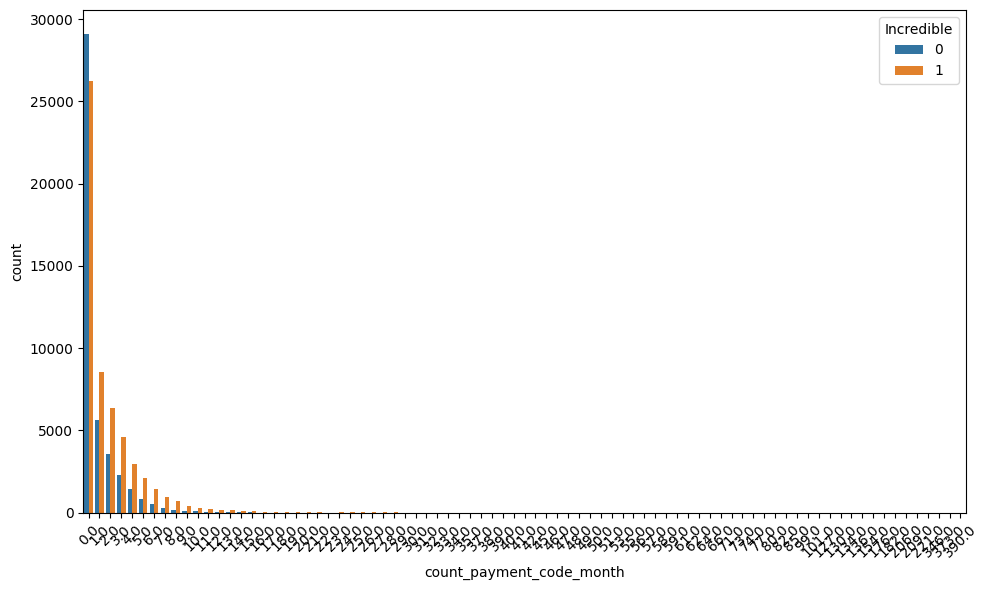

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(df_month, x='count_payment_code_month', hue='Incredible') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

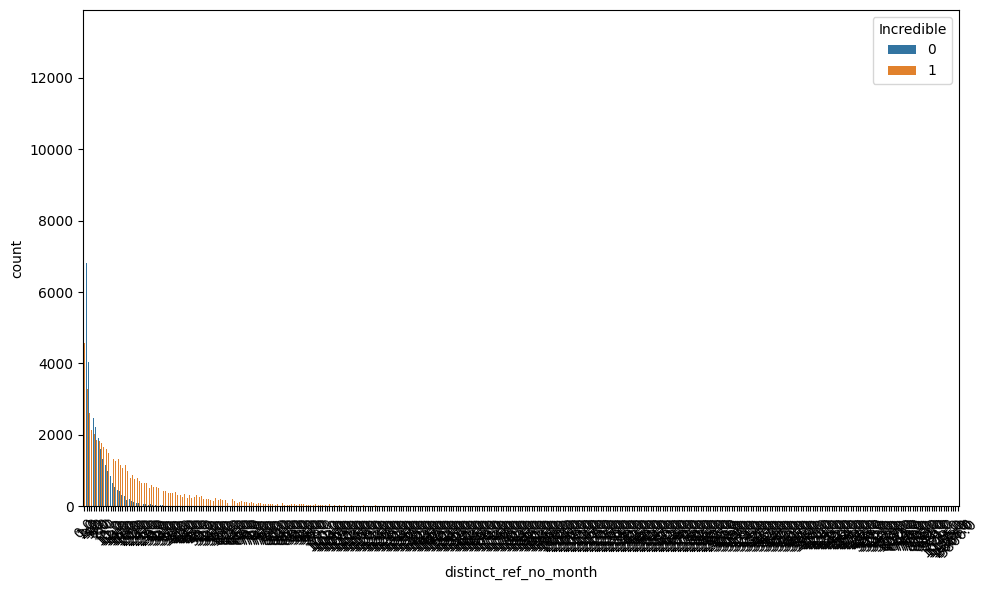

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(df_month, x='distinct_ref_no_month', hue='Incredible') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

- Các kết quả đều giống với Dataset Week, dữ liệu và đặc điểm giao dịch của khách hàng có sự đồng nhất giữa 1 tuần và 1 tháng

# <b> 3.3. Dataset Threemonth

- Tương tự với Dataset Week và Month

In [86]:
three_month = pd.read_csv('three_month.csv')
df_3month = pd.DataFrame(three_month)
df_3month.head()

,Male,Single,Age,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,Incredible
0,1,0,29.0,7.35,40.00,0.5920,0,0,2,33,1
1,1,1,35.0,1.38,6.85,11.0318,0,0,2,5,1
2,1,0,41.0,1.57,6.00,2.1000,2,3,2,7,0
3,1,1,20.0,0.00,0.00,0.0000,0,0,1,1,0
4,1,0,32.0,7.45,38.00,0.0592,1,11,3,24,1


In [87]:
corr_matrix_3month = df_3month.corr()
corr_matrix_3month

,Male,Single,Age,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,Incredible
Male,1.000000,0.057321,0.033725,-0.024118,-0.035209,0.000161,-0.029156,-0.000520,-0.069193,-0.037750,0.002548
Single,0.057321,1.000000,-0.499912,-0.041237,-0.072961,-0.020611,-0.162323,-0.065692,-0.131632,-0.054496,-0.234229
Age,0.033725,-0.499912,1.000000,0.046831,0.089243,0.036756,0.120248,0.029063,0.021533,0.000981,0.190431
amount_3month,-0.024118,-0.041237,0.046831,1.000000,0.667028,0.018858,0.075925,0.049582,0.095760,0.265771,0.100897
max_amount_3month,-0.035209,-0.072961,0.089243,0.667028,1.000000,0.247010,0.089186,0.030266,0.146882,0.126799,0.134102
min_amount_3month,0.000161,-0.020611,0.036756,0.018858,0.247010,1.000000,-0.025742,-0.013862,-0.032138,-0.012600,0.001372
distinct_payment_code_3month,-0.029156,-0.162323,0.120248,0.075925,0.089186,-0.025742,1.000000,0.446044,0.561507,0.257989,0.248639
count_payment_code_3month,-0.000520,-0.065692,0.029063,0.049582,0.030266,-0.013862,0.446044,1.000000,0.293829,0.282549,0.154877
distinct_trans_group_3month,-0.069193,-0.131632,0.021533,0.095760,0.146882,-0.032138,0.561507,0.293829,1.000000,0.328329,0.388154
distinct_ref_no_3month,-0.037750,-0.054496,0.000981,0.265771,0.126799,-0.012600,0.257989,0.282549,0.328329,1.000000,0.273443


In [88]:
high_corr_threshold = 0.5

high_corr_pairs = []

for i in range(len(corr_matrix_3month.columns)):
    for j in range(i):
        if abs(corr_matrix_3month.iloc[i, j]) > high_corr_threshold:
            colname = corr_matrix_3month.columns[i]
            rowname = corr_matrix_3month.index[j]
            high_corr_pairs.append((rowname, colname))

print("Các cặp cột có tương quan cao:")
for pair in high_corr_pairs:
    print(pair)

Các cặp cột có tương quan cao:
('amount_3month', 'max_amount_3month')
('distinct_payment_code_3month', 'distinct_trans_group_3month')


<Axes: xlabel='distinct_payment_code_3month', ylabel='count'>

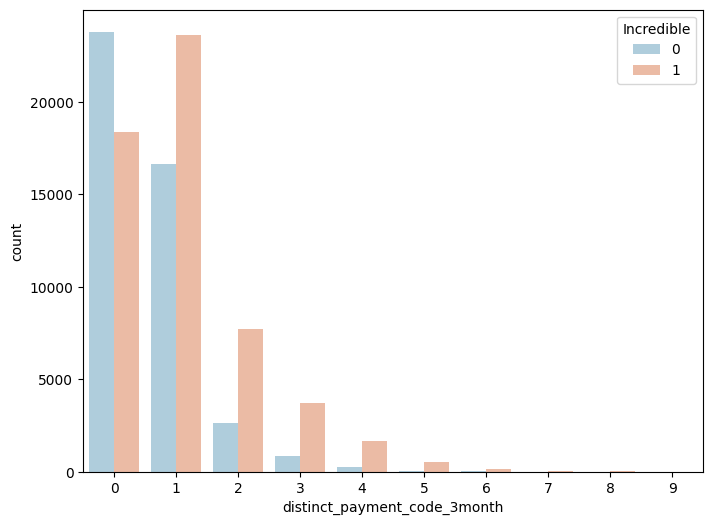

In [89]:
plt.figure(figsize=(8, 6))
sns.countplot(x='distinct_payment_code_3month', hue='Incredible', data=df_3month, palette='RdBu_r')

<Axes: xlabel='distinct_trans_group_3month', ylabel='count'>

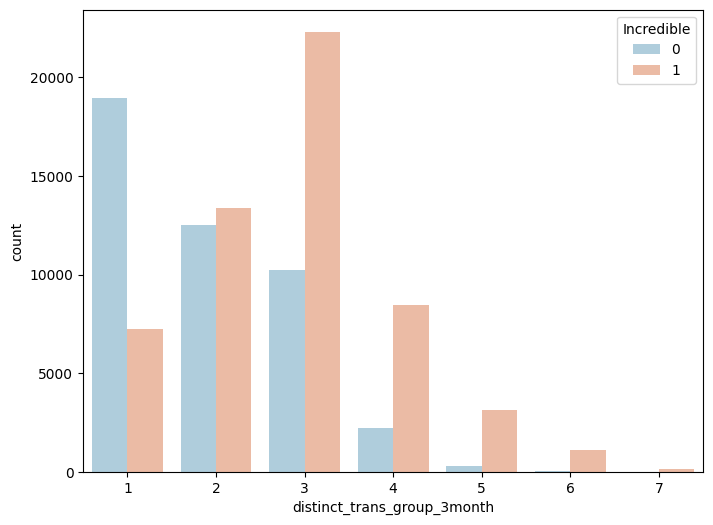

In [90]:
plt.figure(figsize=(8, 6))
sns.countplot(x='distinct_trans_group_3month', hue='Incredible', data=df_3month, palette='RdBu_r')

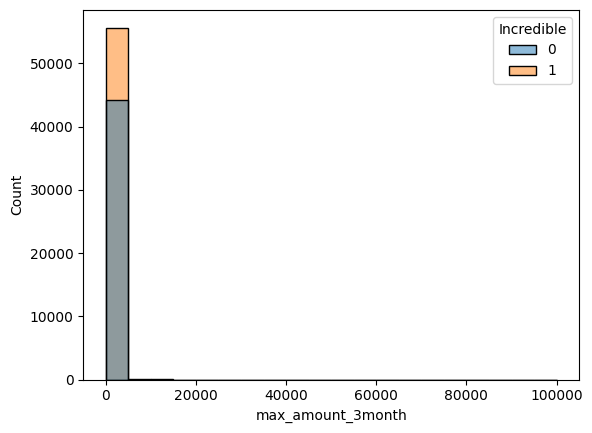

In [91]:
sns.histplot(df_3month, x='max_amount_3month', hue='Incredible', bins=20)
plt.show()

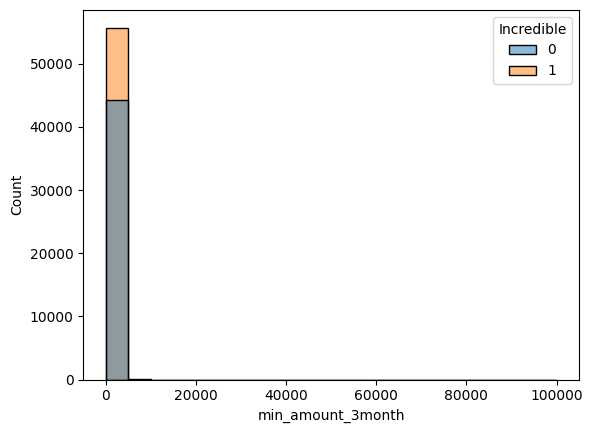

In [92]:
sns.histplot(df_3month, x='min_amount_3month', hue='Incredible', bins=20)
plt.show()

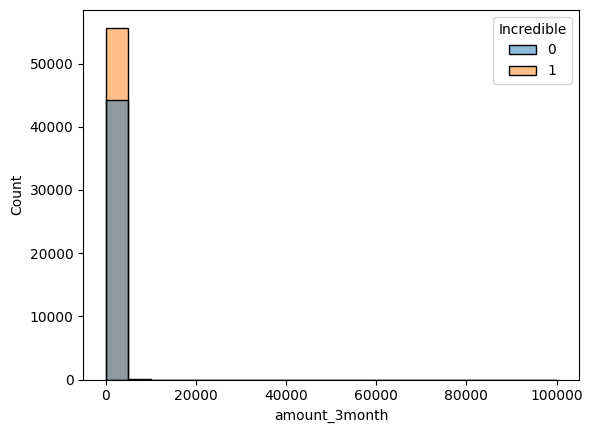

In [93]:
sns.histplot(df_3month, x='amount_3month', hue='Incredible', bins=20)
plt.show()

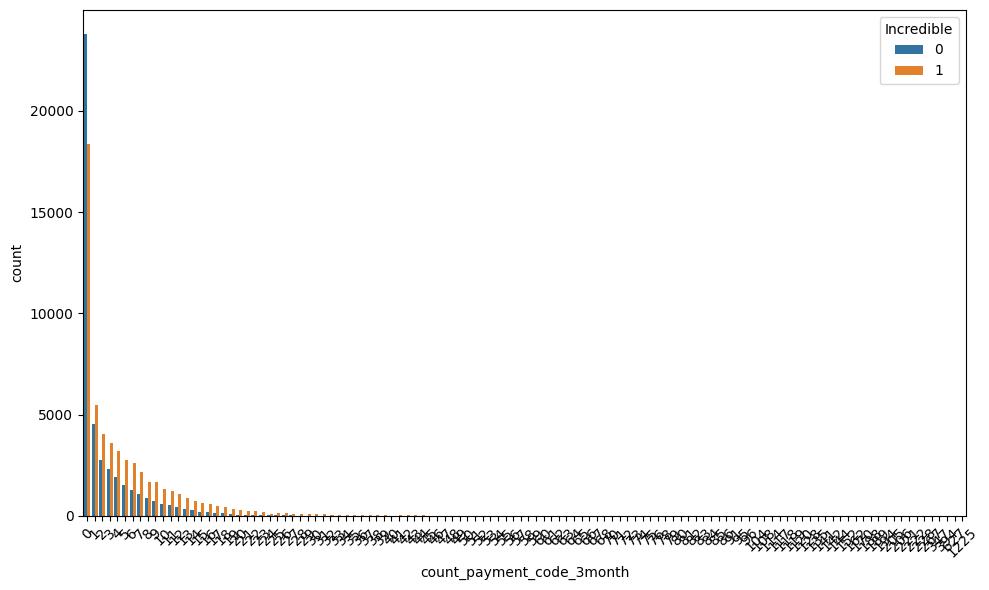

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(df_3month, x='count_payment_code_3month', hue='Incredible') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

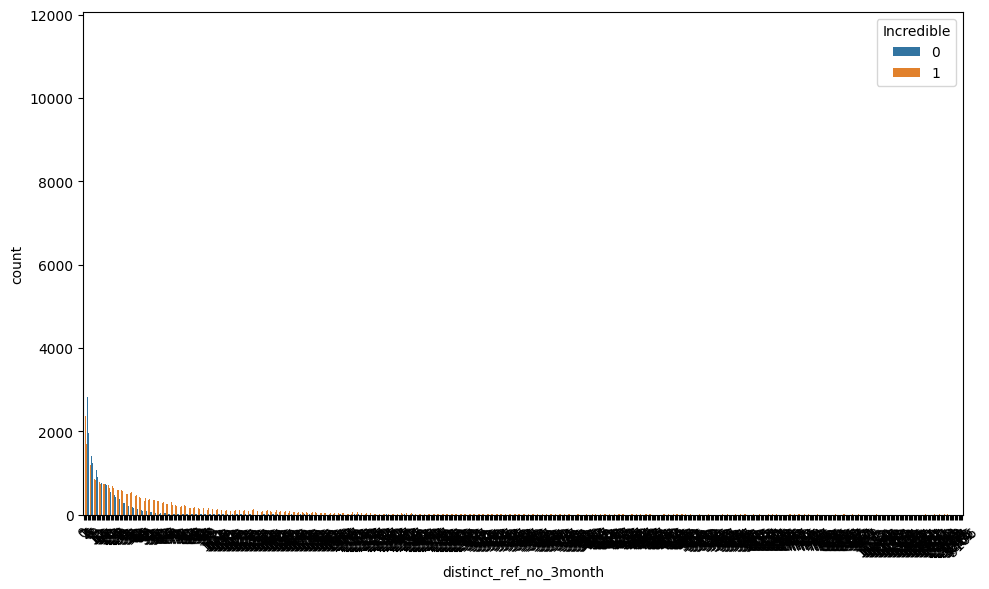

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(df_3month, x='distinct_ref_no_3month', hue='Incredible') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

- Các kết quả đều giống với Dataset Week và Month, dữ liệu và đặc điểm giao dịch của khách hàng có sự đồng nhất giữa 1 tuần, 1 tháng và 3 tháng

# <b> 4. Model

# <b> 4.1. Dataset Week

- Nhóm muốn tối đa hóa khả năng phát hiện các quan sát có nhãn 1 (khách hàng đáng ngờ) nên nhóm chọn sử dụng thang đo recall cho mô hình logistic

- Chia dữ liệu thành 3 tập train, val và test

In [96]:
x_model_w = df_week.drop(columns= ['amount_week', 'distinct_trans_group_week', 'Incredible'])
y_model_w = df_week[['Incredible']]
X_train_w, X_temp_w, y_train_w, y_temp_w = train_test_split(x_model_w, y_model_w, test_size=0.4, random_state=1)
X_val_w, X_test_w, y_val_w, y_test_w = train_test_split(X_temp_w, y_temp_w, test_size=0.5, random_state=1)
print(X_train_w.shape, y_train_w.shape)
print(X_val_w.shape, y_val_w.shape)
print(X_test_w.shape, y_test_w.shape)

(59997, 8) (59997, 1)
(19999, 8) (19999, 1)
(19999, 8) (19999, 1)


- Chuẩn hóa dữ liệu bởi các biến có tập giá trị khác biệt lớn

In [97]:
scaler = StandardScaler()
X_train_sw = scaler.fit_transform(X_train_w)
X_val_sw = scaler.transform(X_val_w)
X_test_sw = scaler.transform(X_test_w)

- Xây dựng mô hình kết hợp tinh chỉnh mô hình

In [98]:
models = [
    (LogisticRegression(),
     {
         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
         'solver': ['liblinear', 'saga'],
         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Only used if penalty='elasticnet'
     }),
    (SGDClassifier(),
     {
         'loss': ['hinge', 'log', 'modified_huber'],
         'penalty': ['l1', 'l2', 'elasticnet'],
         'alpha': [0.0001, 0.001, 0.01, 0.1]
     }),
    (RandomForestClassifier(),
     {
         'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20, 30],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]
     }),
    (GradientBoostingClassifier(),
     {
         'n_estimators': [50, 100, 200],
         'learning_rate': [0.1, 0.05, 0.01],
         'max_depth': [3, 4, 5]
     })
]

best_models = []
val_recalls = []

# Perform hyperparameter tuning for each model
for model, param_dist in models:
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
    random_search.fit(X_train_sw, y_train_w)
    best_model = random_search.best_estimator_
    
    val_pred = best_model.predict(X_val_sw)
    val_recall = recall_score(y_val_w, val_pred)
    
    best_models.append(best_model)
    val_recalls.append(val_recall)

# Select the best model based on validation set performance
best_model_index = np.argmax(val_recalls)
best_model = best_models[best_model_index]
print(f"Best Model: {best_model}")
print(f"Validation Set Recall: {val_recalls[best_model_index]}")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Best Model: RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)
Validation Set Recall: 0.8002495766111062


# <b> 4.2. Dataset Month

- Tương tự Dataset Week

In [99]:
x_model_m = df_month.drop(columns= ['amount_month', 'distinct_trans_group_month', 'Incredible'])
y_model_m = df_month[['Incredible']]
X_train_m, X_temp_m, y_train_m, y_temp_m = train_test_split(x_model_m, y_model_m, test_size=0.4, random_state=1)
X_val_m, X_test_m, y_val_m, y_test_m = train_test_split(X_temp_m, y_temp_m, test_size=0.5, random_state=1)
print(X_train_m.shape, y_train_m.shape)
print(X_val_m.shape, y_val_m.shape)
print(X_test_m.shape, y_test_m.shape)

(59997, 8) (59997, 1)
(19999, 8) (19999, 1)
(19999, 8) (19999, 1)


In [100]:
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_m)
X_val_sm = scaler.transform(X_val_m)
X_test_sm = scaler.transform(X_test_m)

In [101]:
models = [
    (LogisticRegression(),
     {
         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
         'solver': ['liblinear', 'saga'],
         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Only used if penalty='elasticnet'
     }),
    (SGDClassifier(),
     {
         'loss': ['hinge', 'log', 'modified_huber'],
         'penalty': ['l1', 'l2', 'elasticnet'],
         'alpha': [0.0001, 0.001, 0.01, 0.1]
     }),
    (RandomForestClassifier(),
     {
         'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20, 30],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]
     }),
    (GradientBoostingClassifier(),
     {
         'n_estimators': [50, 100, 200],
         'learning_rate': [0.1, 0.05, 0.01],
         'max_depth': [3, 4, 5]
     })
]

best_models = []
val_recalls = []

# Perform hyperparameter tuning for each model
for model, param_dist in models:
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
    random_search.fit(X_train_sm, y_train_m)
    best_model = random_search.best_estimator_
    
    val_pred = best_model.predict(X_val_sm)
    val_recall = recall_score(y_val_m, val_pred)
    
    best_models.append(best_model)
    val_recalls.append(val_recall)

# Select the best model based on validation set performance
best_model_index = np.argmax(val_recalls)
best_model = best_models[best_model_index]
print(f"Best Model: {best_model}")
print(f"Validation Set Recall: {val_recalls[best_model_index]}")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.wa

Best Model: GradientBoostingClassifier(max_depth=4)
Validation Set Recall: 0.8081825474641233


# <b> 4.3. Dataset Three_month

In [102]:
x_model_3m = df_3month.drop(columns= ['amount_3month', 'distinct_trans_group_3month', 'Incredible'])
y_model_3m = df_3month[['Incredible']]
X_train_3m, X_temp_3m, y_train_3m, y_temp_3m = train_test_split(x_model_3m, y_model_3m, test_size=0.4, random_state=1)
X_val_3m, X_test_3m, y_val_3m, y_test_3m = train_test_split(X_temp_3m, y_temp_3m, test_size=0.5, random_state=1)
print(X_train_3m.shape, y_train_3m.shape)
print(X_val_3m.shape, y_val_3m.shape)
print(X_test_3m.shape, y_test_3m.shape)

(59997, 8) (59997, 1)
(19999, 8) (19999, 1)
(19999, 8) (19999, 1)


In [103]:
scaler = StandardScaler()
X_train_s3m = scaler.fit_transform(X_train_3m)
X_val_s3m = scaler.transform(X_val_3m)
X_test_s3m = scaler.transform(X_test_3m)

In [104]:
models = [
    (LogisticRegression(),
     {
         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
         'solver': ['liblinear', 'saga'],
         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Only used if penalty='elasticnet'
     }),
    (SGDClassifier(),
     {
         'loss': ['hinge', 'log', 'modified_huber'],
         'penalty': ['l1', 'l2', 'elasticnet'],
         'alpha': [0.0001, 0.001, 0.01, 0.1]
     }),
    (RandomForestClassifier(),
     {
         'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20, 30],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]
     }),
    (GradientBoostingClassifier(),
     {
         'n_estimators': [50, 100, 200],
         'learning_rate': [0.1, 0.05, 0.01],
         'max_depth': [3, 4, 5]
     })
]

best_models = []
val_recalls = []

# Perform hyperparameter tuning for each model
for model, param_dist in models:
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
    random_search.fit(X_train_s3m, y_train_3m)
    best_model = random_search.best_estimator_
    
    val_pred = best_model.predict(X_val_s3m)
    val_recall = recall_score(y_val_3m, val_pred)
    
    best_models.append(best_model)
    val_recalls.append(val_recall)

# Select the best model based on validation set performance
best_model_index = np.argmax(val_recalls)
best_model = best_models[best_model_index]
print(f"Best Model: {best_model}")
print(f"Validation Set Recall: {val_recalls[best_model_index]}")


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Li

KeyboardInterrupt: 

- Recall của mô hình sử dụng dataset three_month trên tập val tốt nhất trong 3 mô hình => Chọn

In [5]:
best_model_3month = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200)
best_model_3month.fit(X_train_s3m, y_train_3m)

C:\Users\Hoàng Anh Thư\AppData\Local\Temp\ipykernel_28488\1242281750.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model_3month.fit(X_train_s3m, y_train_3m)


RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200)

In [22]:
val_pred = best_model_3month.predict(X_val_s3m)
val_recall = recall_score(y_val_3m, val_pred)
val_recall

0.8176308048845708

In [23]:
conf_matrix = confusion_matrix(y_val_3m, val_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6441 2339]
 [2046 9173]]


D:\Hoang Anh Thu\Documents\Python\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


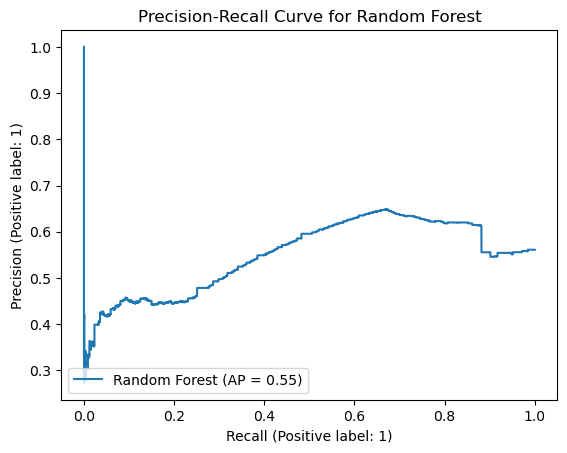

In [90]:
display = PrecisionRecallDisplay.from_estimator(best_model_3month, X_val_3m, y_val_3m, name="Random Forest")
plt.title("Precision-Recall Curve for Random Forest")
plt.show()

- Thử điều chỉnh ngưỡng quyết định nhãn 0 và 1 với mục đích giảm thiểu số nhãn 1 bị dự đoán là 0, chỉ thử trên tập val, không sử dụng tập test

In [6]:
def alter_threshold(prob_array, threshold: float):
    postive_prob_array = prob_array[:, 1]
    return (postive_prob_array >= threshold).astype(int)

In [24]:
threshold = 0.4
train_val_pred_after_threshold = alter_threshold(best_model_3month.predict_proba(X_train_s3m), threshold)
best_model_3month.fit(X_train_s3m, y_train_3m, sample_weight=train_val_pred_after_threshold)
val_pred_after_post_tuning = alter_threshold(best_model_3month.predict_proba(X_val_s3m), threshold)
val_recall = recall_score(y_val_3m, val_pred_after_post_tuning)

print("Val Set Recall after threshold adjustment: ", val_recall)

C:\Users\Hoàng Anh Thư\AppData\Local\Temp\ipykernel_15636\2400025395.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model_3month.fit(X_train_s3m, y_train_3m, sample_weight=train_val_pred_after_threshold)


Val Set Recall after threshold adjustment:  0.9999108654960335


In [25]:
conf_matrix = confusion_matrix(y_val_3m, val_pred_after_post_tuning)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[    1  8779]
 [    1 11218]]


- Với threshold = 0.4, mô hình dự đoán hầu hết các quan sát đều là nhãn 1, điều này tương đương với việc coi tất cả các quan sát là nhãn 1 nên đây không phải ngưỡng threshold tốt

In [26]:
threshold = 0.45
train_val_pred_after_threshold = alter_threshold(best_model_3month.predict_proba(X_train_s3m), threshold)
best_model_3month.fit(X_train_s3m, y_train_3m, sample_weight=train_val_pred_after_threshold)
val_pred_after_post_tuning = alter_threshold(best_model_3month.predict_proba(X_val_s3m), threshold)
val_recall = recall_score(y_val_3m, val_pred_after_post_tuning)

print("Val Set Recall after threshold adjustment: ", val_recall)

C:\Users\Hoàng Anh Thư\AppData\Local\Temp\ipykernel_15636\3766757961.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model_3month.fit(X_train_s3m, y_train_3m, sample_weight=train_val_pred_after_threshold)


Val Set Recall after threshold adjustment:  0.8613958463321152


In [27]:
conf_matrix = confusion_matrix(y_val_3m, val_pred_after_post_tuning)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5893 2887]
 [1555 9664]]


- Với threshold = 0.45, số nhãn 1 bị dự đoán là nhãn 0 đã giảm so với threshold = 0.4 và mô hình không dự đoán hầu hết các nhãn là 1

In [28]:
threshold = 0.46
train_val_pred_after_threshold = alter_threshold(best_model_3month.predict_proba(X_train_s3m), threshold)
best_model_3month.fit(X_train_s3m, y_train_3m, sample_weight=train_val_pred_after_threshold)
val_pred_after_post_tuning = alter_threshold(best_model_3month.predict_proba(X_val_s3m), threshold)
val_recall = recall_score(y_val_3m, val_pred_after_post_tuning)

print("Val Set Recall after threshold adjustment: ", val_recall)

C:\Users\Hoàng Anh Thư\AppData\Local\Temp\ipykernel_15636\197183140.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model_3month.fit(X_train_s3m, y_train_3m, sample_weight=train_val_pred_after_threshold)


Val Set Recall after threshold adjustment:  0.9983955789286033


In [29]:
conf_matrix = confusion_matrix(y_val_3m, val_pred_after_post_tuning)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   13  8767]
 [   18 11201]]


- Với threshold = 0.46, mô hình bắt đầu dự đoán hầu hết các quan sát là nhãn 1 => không tốt

In [32]:
threshold = 0.455
train_val_pred_after_threshold = alter_threshold(best_model_3month.predict_proba(X_train_s3m), threshold)
best_model_3month.fit(X_train_s3m, y_train_3m, sample_weight=train_val_pred_after_threshold)
val_pred_after_post_tuning = alter_threshold(best_model_3month.predict_proba(X_val_s3m), threshold)
val_recall = recall_score(y_val_3m, val_pred_after_post_tuning)

print("Val Set Recall after threshold adjustment: ", val_recall)

C:\Users\Hoàng Anh Thư\AppData\Local\Temp\ipykernel_15636\420040548.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model_3month.fit(X_train_s3m, y_train_3m, sample_weight=train_val_pred_after_threshold)


Val Set Recall after threshold adjustment:  0.997415099384972


- Threshold = 0.455 cũng không phải là một threshold tốt => Nhóm chọn threshold = 0.45

In [8]:
X_train_df = pd.DataFrame(X_train_s3m)
X_val_df = pd.DataFrame(X_val_s3m)
y_train_df = pd.DataFrame(y_train_3m)
y_val_df = pd.DataFrame(y_val_3m)

# Kết hợp các DataFrame
X_combined_df = pd.concat([X_train_df, X_val_df], axis=0).reset_index(drop=True)
y_combined_df = pd.concat([y_train_df, y_val_df], axis=0).reset_index(drop=True)

# Chuyển đổi lại sang numpy array
X_combined_s3m = X_combined_df.to_numpy()
y_combined_3m = y_combined_df.to_numpy().ravel()
# Bước 1: Điều chỉnh ngưỡng quyết định
threshold = 0.45
train_val_pred_after_threshold = alter_threshold(best_model_3month.predict_proba(X_combined_s3m), threshold)

# Bước 2: Huấn luyện lại mô hình trên dữ liệu kết hợp với ngưỡng đã điều chỉnh
best_model_3month.fit(X_combined_s3m, y_combined_3m, sample_weight=train_val_pred_after_threshold)

# Bước 3: Đánh giá trên tập test
test_pred_after_post_tuning = alter_threshold(best_model_3month.predict_proba(X_test_s3m), threshold)
test_recall = recall_score(y_test_3m, test_pred_after_post_tuning)

print("Test Set Recall after threshold adjustment: ", test_recall)

Test Set Recall after threshold adjustment:  0.8668056940792456


In [31]:
conf_matrix = confusion_matrix(y_test_3m, test_pred_after_post_tuning)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5876 3094]
 [1489 9540]]


# <b> 5. Kết quả và thảo luận

- Ngân hàng có thể xác định khách hàng đáng ngờ chính xác nhất sau 9 tháng. Nhưng nếu cần nhanh hơn, ngân hàng hoàn toàn có thể xác định khách hàng đáng ngờ sau 3 tháng, tuy kết quả không tốt bằng xác định sau 9 tháng nhưng phần chênh lệch là không đáng kể 

- Để tối đa hóa việc phát hiện nhãn 1 mà không quy tất cả khách hàng là đáng ngờ, với bộ dữ liệu này nên để ngưỡng quyết định nhãn 1 là 0,45 chứ không nên để mặc định 0,5

- Recall = 0.866 ở mức khá ổn

- Ma trận nhiễu

True Negative (TN): Có 5876 mẫu được dự đoán là 0 và thực tế là 0.

False Positive (FP): Có 3094 mẫu bị dự đoán là 1 nhưng thực tế là 0.

<b> False Negative (FN): Có 1489 mẫu bị dự đoán là 0 nhưng thực tế là 1.

True Positive (TP): Có 9540 mẫu được dự đoán là 1 và thực tế là 1.

=> Mô hình có 1489 quan sát nhãn 1 (đáng ngờ) nhưng bị xếp loại là 0 (không đáng ngờ). Tuy nhiên đây là một kết quả chấp nhận được bởi không mô hình nào là hoàn hảo, đây là mô hình không quy tất cả khách hàng là đáng ngờ, tiết kiệm tài nguyên theo dõi và là mô hình tốt nhất trong các mô hình được tinh chỉnh

- Mức độ đóng góp của các biến

In [12]:
df_3month.columns

Index(['Male', 'Single', 'Age', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'Incredible'],
      dtype='object')

In [13]:
feature_names = ['Male', 'Single', 'Age', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month',
       'distinct_ref_no_3month']
X_combined_s3m = pd.DataFrame(X_combined_s3m, columns=feature_names)
feature_importances = best_model_3month.feature_importances_

# Tạo DataFrame để hiển thị kết quả
importance_df = pd.DataFrame({
    'Feature': X_combined_s3m.columns,
    'Importance': feature_importances
})

# Sắp xếp các biến theo mức độ quan trọng giảm dần
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

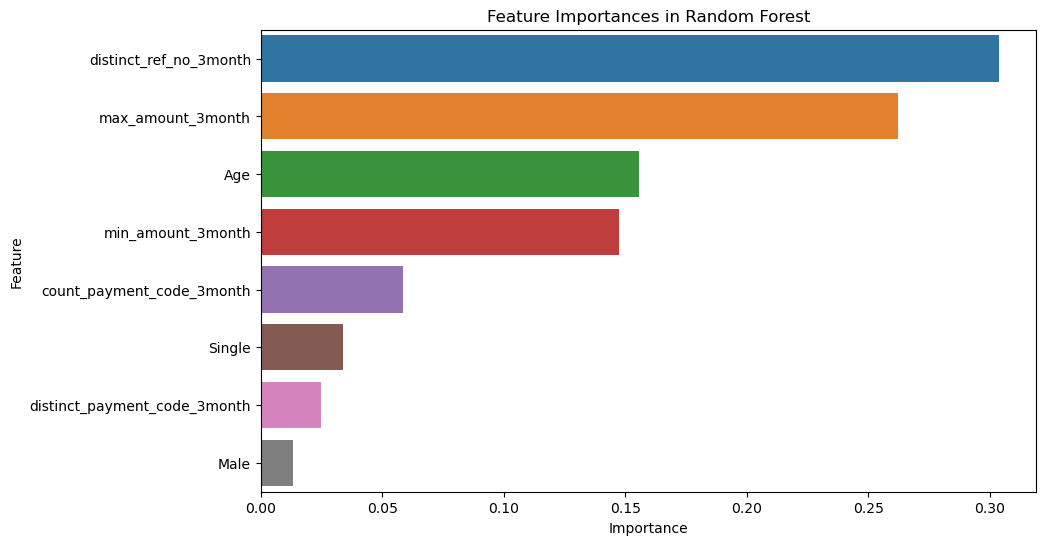

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.show()

- Số lượng người nhận giao dịch đóng vai trò lớn nhất trong việc quyết định khách hàng đáng ngờ. Điều này là đúng trong thực tế, khi một tài khoản có số tiền bất hợp pháp chia nhỏ thành nhiều lần giao dịch tới các tài khoản ảo khác nhau
- Số tiền giao dịch lớn nhất cũng đóng vai trò quan trọng trong việc quyết định khách hàng đáng ngờ. Điều này cũng đúng trong thực tế, khi một tài khoản có số tiền giao dịch lớn bất ngờ so với tài khoản đó và so với các tài khoản khác
- Tiếp theo đó là độ tuổi, độ tuổi từ 20 đến 30 chiếm phần lớn khách hàng đáng ngờ. Trong thực tế, những người ở độ tuổi từ 20-30, đang trong độ tuổi lao động và còn trẻ, có thể có mong muốn khởi nghiệp hoặc chưa có kế hoạch tài chính tốt, hay thậm chí những đối tượng lừa đảo qua không gian mạng là những người trẻ tuổi nhiều hơn. Dẫn đến biến độ tuổi có ảnh hưởng tới việc xác định khách hàng đáng ngờ
- Ngoài số tiền giao dịch lớn nhất, số tiền giao dịch nhỏ nhất lớn bất ngờ cũng có thể là một dấu hiệu của khách hàng đáng ngờ
- Các cột còn lại có ảnh hưởng không đáng kể tới việc xác định khách hàng đáng ngờ, có thể hiểu là dù khách hàng sử dụng loại dịch vụ nào, tình trạng hôn nhân ra sao, giới tính nào thì cũng đều có khả năng là khách hàng đáng ngờ

# <b> 6. Hạn chế và định hướng

- Bộ dữ liệu không có đơn vị nên nhóm không sửa được các lỗi đã nêu ở phần các trường dữ liệu liên quan đến giao dịch năm 2020
- Nhóm không thể liên lạc với các bên liên quan để làm rõ hơn đặc điểm của dữ liệu để chỉnh sửa, fill NaN một cách chính xác hơn
- Một số biểu đồ chưa trực quan hóa dữ liệu tốt
- Nhóm chưa sử dụng LearningCurveDisplay và Loss curves để tiết kiệm thời gian tinh chỉnh mô hình, tiết kiệm tài nguyên máy tính
- Nhóm chưa chỉ ra được cụ thể ngưỡng để xác định khách hàng đáng ngờ của các yếu tố đóng vai trò lớn trong việc xác định khách hàng đáng ngờ 

# <b> 7. Reflection

2 tuần trước, nhóm chúng em bắt đầu làm bài cuối khóa từ những bước xử lý đơn giản nhất. Ban đầu, bọn em cảm thấy rất mông lung với đề tài khi không biết cách tự xác định khách hàng đáng ngờ và chưa thuần thục các kỹ thuật phân tích dữ liệu. Mọi người cũng không thích làm việc nhóm cùng nhau bởi không quen nhau từ trước và khó sắp xếp thời gian rảnh. Nhưng rồi bọn em cũng đã họp online vào tối muộn để có thể hoàn thành bài tập. Khi xử lý dữ liệu, missing values, tiêu chí quyết định khách hàng đáng ngờ và cách sửa các đoạn code bị lỗi là những việc tốn nhiều thời gian của chúng em nhất và cũng làm chúng em nản nhất. Bù lại các thành viên trong nhóm luôn vui vẻ và không tranh cãi khi có ý kiến trái chiều. Để giải quyết những khó khăn gặp phải khi làm bài, bọn em đã đọc lại lý thuyết tìm hiểu thêm các tài liệu trên mạng, xử lý từng cột thông tin, nghiền ngẫm bộ dữ liệu trong nhiều ngày. Cuối cùng bọn em cũng đã vượt qua phần xử lý dữ liệu, khai thác được thêm thông tin, xây dựng và tinh chỉnh mô hình sau khi thử đi thử lại và sửa code nhiều lần. Nếu được giao một dự án khác trong tương lai, bọn em sẽ dựa theo những kinh nghiệm, kiến thức, kỹ năng đã rèn luyện được để giải quyết bài toán đúng quy trình hơn, tiết kiệm thời gian và tài nguyên hơn cũng như có kết quả tốt hơn. Ngoài ra, đây cũng là một trải nghiệm rất bổ ích để bọn em có thể làm việc nhóm hiệu quả hơn sau này.